<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mat_content = sio.loadmat('face.mat')
1
# mat_content # Let's see the content... 
np.random.seed(1)

In [0]:
face_data = mat_content['X']
face_labels = mat_content['l']

#transpose to select test and training data
face_data = face_data
face_labels = face_labels

1 [0, 1, 2, 3, 4, 5, 6, 7] 8
2 [8, 9, 10, 11, 12, 13, 14, 15] 8
3 [16, 17, 18, 19, 20, 21, 22, 23] 8
4 [24, 25, 26, 27, 28, 29, 30, 31] 8
5 [32, 33, 34, 35, 36, 37, 38, 39] 8
6 [40, 41, 42, 43, 44, 45, 46, 47] 8
7 [48, 49, 50, 51, 52, 53, 54, 55] 8
8 [56, 57, 58, 59, 60, 61, 62, 63] 8
9 [64, 65, 66, 67, 68, 69, 70, 71] 8
10 [72, 73, 74, 75, 76, 77, 78, 79] 8
11 [80, 81, 82, 83, 84, 85, 86, 87] 8
12 [88, 89, 90, 91, 92, 93, 94, 95] 8
13 [96, 97, 98, 99, 100, 101, 102, 103] 8
14 [104, 105, 106, 107, 108, 109, 110, 111] 8
15 [112, 113, 114, 115, 116, 117, 118, 119] 8
16 [120, 121, 122, 123, 124, 125, 126, 127] 8
17 [128, 129, 130, 131, 132, 133, 134, 135] 8
18 [136, 137, 138, 139, 140, 141, 142, 143] 8
19 [144, 145, 146, 147, 148, 149, 150, 151] 8
20 [152, 153, 154, 155, 156, 157, 158, 159] 8
21 [160, 161, 162, 163, 164, 165, 166, 167] 8
22 [168, 169, 170, 171, 172, 173, 174, 175] 8
23 [176, 177, 178, 179, 180, 181, 182, 183] 8
24 [184, 185, 186, 187, 188, 189, 190, 191] 8
25 [192, 193, 1

<Figure size 1440x720 with 0 Axes>

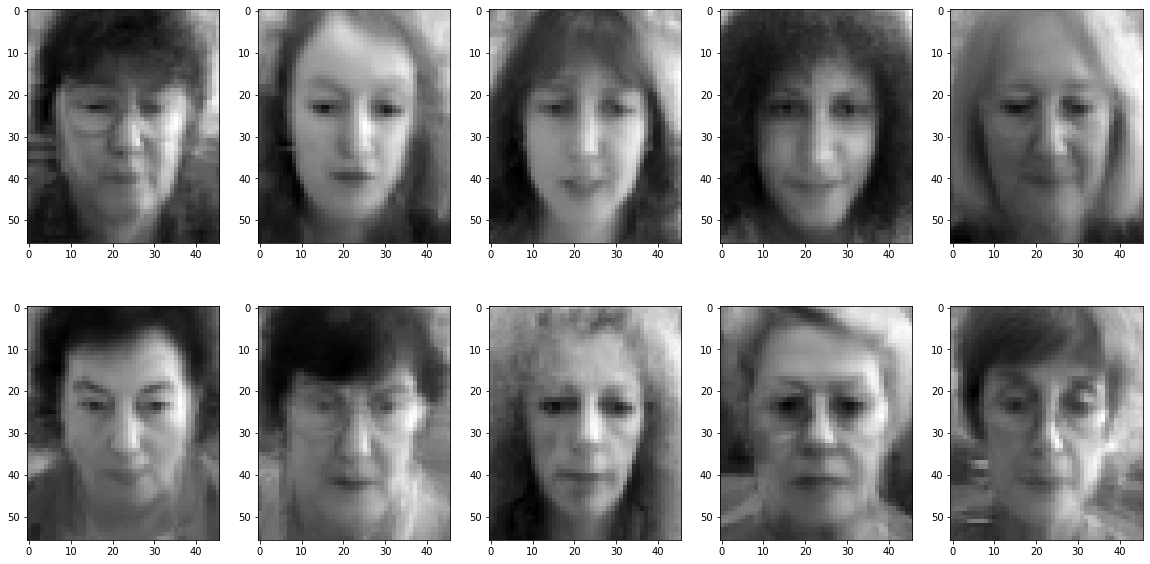

In [27]:
#20/80 test/training split
# data_train, data_test, label_train, label_test = train_test_split(
#     face_data.T, face_labels.T, test_size=0.2, random_state =1 )
# face_data = face_data.T
# face_labels = face_labels.T

data_train = np.reshape(face_data[:,:8],(2576,8))
data_test= np.reshape(face_data[:,8:10],(2576,2))
label_train = np.reshape(face_labels[:,:8],(1,8))
label_test = np.reshape(face_labels[:,8:10],(1,2))


for i in range(10,520,10):
    data_train = np.concatenate((data_train, face_data[:,i:i+8]),axis=1)
    data_test = np.concatenate((data_test, face_data[:,i+8:i+10]),axis=1)
    label_train = np.concatenate((label_train, face_labels[:,i:i+8]),axis=1)
    label_test = np.concatenate((label_test, face_labels[:,i+8:i+10]), axis=1)
    
    
class_indexes = {k : [] for k in range(1, 53)}
for i in range(label_train.shape[1]):
    class_indexes[label_train.T[i].item()].append(i)
    
for i in range(1, len(class_indexes) + 1):
    print(i, class_indexes[i], len(class_indexes[i]))

fig = plt.figure(figsize = (20, 10))

class_means = []

for i in range(1, len(class_indexes)+1):
    temp = np.zeros(2576)
    for k in class_indexes[i]:
        temp += data_train.T[k]
    class_means.append(temp/len(class_indexes[i]))
class_means = np.asarray(class_means)
fig = plt.figure(figsize = (20, 10))

for i in range(10):
    img = np.reshape(class_means[i], (46, 56))
    fig.add_subplot(2, 5, i+1)
    plt.imshow(img.T, cmap = 'gist_gray' )
plt.show()

In [0]:
mean_face = np.mean(data_train, axis = 1)

print('Mean Face Shape {}'.format( mean_face.shape))
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')



In [47]:
print(data_train.shape)
print(label_train.shape)
train_subspaces = []
for i in range(52):
    images = []
    for j in range(int(data_train.shape[1])):
        if label_train.T[j][0] == i+1:
          images.append(data_train.T[j])
    images=np.asarray(images)
    train_subspaces.append(images)
print('    shape:', np.asarray(train_subspaces).shape)

(2576, 416)
(1, 416)
    shape: (52, 8, 2576)


In [0]:
def SWSB(bag_subspaces, X_bar_bag):
    elements = np.asarray(bag_subspaces[0])
    elements_mean = np.mean(elements, axis=0)
    elements = np.subtract(elements,elements_mean)
    S_W = np.matmul(elements.T,elements)
    mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
#     print(mean_diff.shape)
    S_B = np.matmul(mean_diff.T, mean_diff)
    for i in range(1,52):
#         print(i)
        elements = np.asarray(bag_subspaces[i])
#         print(train_subspaces.shape)
        elements_mean = np.mean(elements, axis=0)
        elements = np.subtract(elements,elements_mean)
        S_W += np.matmul(elements.T,elements)
        mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
        S_B += np.matmul(mean_diff.T, mean_diff)
    
    return S_W, S_B

In [51]:
S_W, S_B = SWSB(train_subspaces, mean_face)
print('S_B: {}'.format(S_B.shape))
print('Rank of S_B:', np.linalg.matrix_rank(S_B))
print('S_W: {}'.format(S_W.shape))
print('Rank of S_W:', np.linalg.matrix_rank(S_W))

S_B: (2576, 2576)
Rank of S_B: 51
class scatter (1, 8, 8)
S_W: (2576, 2576)
Rank of S_W: 364


In [67]:
from sklearn import preprocessing

def createA(data):
  avg = np.mean(data, axis = 0)
  A = np.empty([0,2576])
  for i in range(len(data)):
    app = np.array([data[i] - avg])
    newA = np.append(A, app, axis = 0)
    A = newA
  A = A.T

  return  A, avg

def createEig(A, S):
  eigvals, eigvecs = np.linalg.eig(S)
  eigvecs = preprocessing.normalize(np.real(np.dot(A, eigvecs).T))
  idx = eigvals.argsort()[::-1]   
  eigvals = eigvals[idx]
  eigvecs  = eigvecs[idx, :]
  return eigvals, eigvecs

def PCA(data_train):
  A, avg = createA(data_train)
  #Low-dimensional computation of eigenspace of dataset 1
  S2 = np.dot(A.T, A)*1/len(data_train)
  Meigvals_new, Meigvecs_new = createEig(A, S2)
  return Meigvals_new, Meigvecs_new, A, avg

Meigvals_new, Meigvecs_new, A, avg = PCA(data_train.T)

Mpca = 200
Mlda = 30
eigvecsM = Meigvecs_new[:M]

Wpca = np.dot(A.T, eigvecsM.T).T
print(Wpca.shape)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = Wpca.T
Y = label_train.reshape(label_train.shape[1])
classifier = LinearDiscriminantAnalysis(n_components = Mlda)
classifier.fit(X, Y)


X_test = np.dot(eigvecsM, data_test ).T

Y_test_predicted = classifier.predict(X_test)
Y_test = label_test

Accuracy = np.sum( Y_test_predicted == Y_test )

print( 'Accuracy: {}'.format( Accuracy ))

(200, 416)
Accuracy: 92
